# Outline
這次總共訓練了4個神經網路：

1.使用最原始loss function: mse，activation fuction使用sigmoid

2.loss function換成適合多分類問題的cross entropy

3.除了loss function換成適合多分類問題的cross entropy外，將activation function換成鼎鼎大名的relu

4.為了防止overfitting的問題，加入了Dropout跟early stopping

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [4]:
x_train -= x_train.min()
x_train = x_train/x_train.max()
x_test -= x_test.min()
x_test = x_test/x_test.max()

In [5]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train ,10)
y_test = np_utils.to_categorical(y_test, 10)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam

使用最原始loss function: mse，activation fuction使用sigmoid

In [7]:
model = Sequential()
model.add(Dense(100,input_dim = 784))
model.add(Activation('sigmoid'))
model.add(Dense(500))
model.add(Activation('sigmoid'))
model.add(Dense(250))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [8]:
model.compile(loss='mse', optimizer=SGD(lr=0.5),
              metrics=['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               50500     
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               125250    
_________________________________________________________________
activation_3 (Activation)    (None, 250)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2510      
__________

In [10]:
model_out = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 4s 71us/step - loss: 0.0900 - acc: 0.1120 - val_loss: 0.0900 - val_acc: 0.1050
Epoch 2/20
54000/54000 [==============================] - 4s 67us/step - loss: 0.0899 - acc: 0.1162 - val_loss: 0.0899 - val_acc: 0.1050
Epoch 3/20
54000/54000 [==============================] - 4s 67us/step - loss: 0.0899 - acc: 0.1229 - val_loss: 0.0899 - val_acc: 0.1050
Epoch 4/20
54000/54000 [==============================] - 4s 69us/step - loss: 0.0898 - acc: 0.1250 - val_loss: 0.0897 - val_acc: 0.1113
Epoch 5/20
54000/54000 [==============================] - 3s 62us/step - loss: 0.0897 - acc: 0.1315 - val_loss: 0.0897 - val_acc: 0.2002
Epoch 6/20
54000/54000 [==============================] - 3s 62us/step - loss: 0.0896 - acc: 0.1457 - val_loss: 0.0896 - val_acc: 0.1045
Epoch 7/20
54000/54000 [==============================] - 3s 61us/step - loss: 0.0895 - acc: 0.1552 - val_loss: 0.0895 - val_acc:

In [11]:
score = model.evaluate(x_train, y_train)
print('loss:', score[0])
print('accuracy:', score[1])

60000/60000 [==============================] - 3s 49us/step
loss: 0.04064708680311839
accuracy: 0.73155


In [12]:
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('accuracy:', score[1])

10000/10000 [==============================] - 0s 49us/step
loss: 0.040078217858076096
accuracy: 0.7342


In [13]:
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [14]:
CMtest = confusion_matrix(y_test.argmax(1), model.predict(x_test).argmax(1))
CMtest = pd.DataFrame(CMtest,index = ["true_0","true_1","true_2","true_3","true_4","true_5","true_6","true_7","true_8","true_9"],
                     columns = ["predict_0","predict_1","predict_2","predict_3","predict_4","predict_5","predict_6","predict_7","predict_8","predict_9"])
CMtest

,predict_0,predict_1,predict_2,predict_3,predict_4,predict_5,predict_6,predict_7,predict_8,predict_9
true_0,953,0,1,1,1,15,7,1,1,0
true_1,0,1115,5,6,0,0,1,1,7,0
true_2,16,24,661,99,24,30,113,12,40,13
true_3,5,9,29,843,0,41,2,25,48,8
true_4,1,5,5,0,656,1,45,17,18,234
true_5,63,3,31,184,13,427,42,83,38,8
true_6,30,2,40,0,8,17,855,0,5,1
true_7,10,50,7,2,2,6,0,887,28,36
true_8,14,32,128,121,16,78,52,46,448,39
true_9,14,13,1,6,144,18,9,294,13,497


loss function換成適合多分類問題的cross entropy

In [15]:
model2 = Sequential()
model2.add(Dense(100,input_dim = 784))
model2.add(Activation('sigmoid'))
model2.add(Dense(500))
model2.add(Activation('sigmoid'))
model2.add(Dense(250))
model2.add(Activation('sigmoid'))
model2.add(Dense(10))
model2.add(Activation('softmax'))

In [16]:
model2.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.05),
               metrics=['accuracy'])

In [17]:
model2_out = model2.fit(x_train, y_train, batch_size=100, epochs=20, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 4s 74us/step - loss: 2.3061 - acc: 0.1140 - val_loss: 2.3025 - val_acc: 0.0995
Epoch 2/20
54000/54000 [==============================] - 3s 64us/step - loss: 2.2841 - acc: 0.1425 - val_loss: 2.2654 - val_acc: 0.2023
Epoch 3/20
54000/54000 [==============================] - 4s 66us/step - loss: 2.1975 - acc: 0.2713 - val_loss: 2.0539 - val_acc: 0.3285
Epoch 4/20
54000/54000 [==============================] - 4s 68us/step - loss: 1.7098 - acc: 0.4380 - val_loss: 1.3681 - val_acc: 0.5465
Epoch 5/20
54000/54000 [==============================] - 4s 67us/step - loss: 1.2313 - acc: 0.5853 - val_loss: 1.0224 - val_acc: 0.6812
Epoch 6/20
54000/54000 [==============================] - 4s 68us/step - loss: 0.9242 - acc: 0.7090 - val_loss: 0.7305 - val_acc: 0.8062
Epoch 7/20
54000/54000 [==============================] - 3s 65us/step - loss: 0.7354 - acc: 0.7766 - val_loss: 0.5937 - val_acc:

In [18]:
score = model2.evaluate(x_train, y_train)
print('loss:', score[0])
print('accuracy:', score[1])

60000/60000 [==============================] - 3s 51us/step
loss: 0.2802912183572849
accuracy: 0.9183833333333333


In [19]:
score = model2.evaluate(x_test, y_test)
print('loss:', score[0])
print('accuracy:', score[1])

10000/10000 [==============================] - 1s 59us/step
loss: 0.27521061472296715
accuracy: 0.9178


將activation function換成鼎鼎大名的relu

In [20]:
model3 = Sequential()
model3.add(Dense(100,input_dim = 784))
model3.add(Activation('relu'))
model3.add(Dense(500))
model3.add(Activation('relu'))
model3.add(Dense(250))
model3.add(Activation('relu'))
model3.add(Dense(10))
model3.add(Activation('softmax'))

In [21]:
model3.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.05),
               metrics=['accuracy'])

In [22]:
model3_out = model3.fit(x_train, y_train, batch_size=100, epochs=20, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 4s 69us/step - loss: 0.5684 - acc: 0.8430 - val_loss: 0.2431 - val_acc: 0.9278
Epoch 2/20
54000/54000 [==============================] - 3s 65us/step - loss: 0.2522 - acc: 0.9252 - val_loss: 0.1860 - val_acc: 0.9478
Epoch 3/20
54000/54000 [==============================] - 3s 64us/step - loss: 0.1935 - acc: 0.9433 - val_loss: 0.1577 - val_acc: 0.9560
Epoch 4/20
54000/54000 [==============================] - 4s 70us/step - loss: 0.1562 - acc: 0.9539 - val_loss: 0.1184 - val_acc: 0.9675
Epoch 5/20
54000/54000 [==============================] - 4s 81us/step - loss: 0.1316 - acc: 0.9606 - val_loss: 0.1067 - val_acc: 0.9708
Epoch 6/20
54000/54000 [==============================] - 5s 91us/step - loss: 0.1133 - acc: 0.9660 - val_loss: 0.1007 - val_acc: 0.9727
Epoch 7/20
54000/54000 [==============================] - 4s 80us/step - loss: 0.0984 - acc: 0.9706 - val_loss: 0.0918 - val_acc:

In [24]:
score = model3.evaluate(x_train, y_train)
print('loss:', score[0])
print('accuracy:', score[1])

60000/60000 [==============================] - 3s 53us/step
loss: 0.026993594188685528
accuracy: 0.9931166666666666


In [25]:
score = model3.evaluate(x_test, y_test)
print('loss:', score[0])
print('accuracy:', score[1])

10000/10000 [==============================] - 1s 54us/step
loss: 0.08169718511545798
accuracy: 0.9749


加入dropout跟early stopping

In [26]:
from keras.layers import Dropout

In [27]:
model4 = Sequential()
model4.add(Dense(100,input_dim = 784))
model4.add(Activation('relu'))
model4.add(Dropout(0.2))
model4.add(Dense(500))
model4.add(Activation('relu'))
model4.add(Dropout(0.2))
model4.add(Dense(250))
model4.add(Activation('relu'))
model4.add(Dropout(0.2))
model4.add(Dense(10))
model4.add(Activation('softmax'))

In [28]:
model4.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.05),
               metrics=['accuracy'])

In [29]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=2)

In [30]:
model4_out = model4.fit(x_train, y_train, batch_size=100, epochs=20, validation_split=0.1, callbacks=[early_stopping])


Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 6s 115us/step - loss: 0.7683 - acc: 0.7607 - val_loss: 0.2499 - val_acc: 0.9277
Epoch 2/20
54000/54000 [==============================] - 5s 101us/step - loss: 0.3402 - acc: 0.8980 - val_loss: 0.1776 - val_acc: 0.9455
Epoch 3/20
54000/54000 [==============================] - 6s 115us/step - loss: 0.2630 - acc: 0.9222 - val_loss: 0.1447 - val_acc: 0.9577
Epoch 4/20
54000/54000 [==============================] - 6s 116us/step - loss: 0.2210 - acc: 0.9332 - val_loss: 0.1144 - val_acc: 0.9668
Epoch 5/20
54000/54000 [==============================] - 6s 111us/step - loss: 0.1920 - acc: 0.9415 - val_loss: 0.1058 - val_acc: 0.9690
Epoch 6/20
54000/54000 [==============================] - 6s 109us/step - loss: 0.1708 - acc: 0.9496 - val_loss: 0.0967 - val_acc: 0.9717
Epoch 7/20
54000/54000 [==============================] - 6s 107us/step - loss: 0.1543 - acc: 0.9535 - val_loss: 0.0904 - v

In [31]:
score = model4.evaluate(x_train, y_train)
print('loss:', score[0])
print('accuracy:', score[1])

60000/60000 [==============================] - 7s 114us/step
loss: 0.04114108771386091
accuracy: 0.9876833333333334


In [32]:
score = model4.evaluate(x_test, y_test)
print('loss:', score[0])
print('accuracy:', score[1])

10000/10000 [==============================] - 1s 91us/step
loss: 0.07820440290218685
accuracy: 0.9759


互動小程式

In [33]:
from ipywidgets import interact

In [34]:
predict = model4.predict_classes(x_test)
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('原本給的label為：', y_test.argmax(1)[測試編號])
    print('神經網路判斷為:',predict[測試編號])

In [35]:
interact(test, 測試編號=(0,9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Output()), _dom_classes=('widget-in…

<function __main__.test(測試編號)>

將訓練好的神經網路存起來

In [36]:
model_json = model.to_json()
open('hand_writing.json', 'w').write(model_json)
model.save_weights('hand_writing_weight.h5')

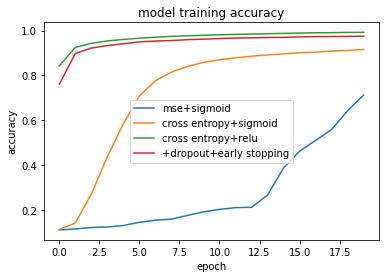

In [37]:
plt.plot(model_out.history["acc"])
plt.plot(model2_out.history["acc"])
plt.plot(model3_out.history["acc"])
plt.plot(model4_out.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["mse+sigmoid","cross entropy+sigmoid","cross entropy+relu","+dropout+early stopping"],loc="best")
plt.show()


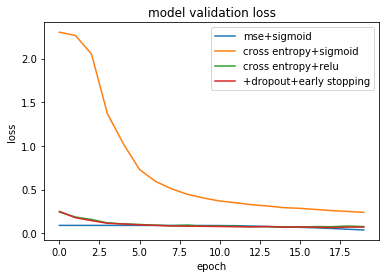

In [38]:
plt.plot(model_out.history["val_loss"])
plt.plot(model2_out.history["val_loss"])
plt.plot(model3_out.history["val_loss"])
plt.plot(model4_out.history["val_loss"])

plt.title("model validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["mse+sigmoid","cross entropy+sigmoid","cross entropy+relu","+dropout+early stopping"],loc="best")
plt.show()